In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from gurobipy import *


In [2]:
X = int(input("Enter number of vertices "))


Enter number of vertices 6


In [3]:
import random
import math

# to make connected graph first randomly  selceted a node
# then node is connected to randomly to another node
#then that node is connected to another node so that each node atleast will have 1 edge

    
y=[]
i=0

while i <X:
    k = random.randint (0, X-1)
    if k not in y:
        y.append(k)
        i+=1
        

    
    

In [4]:
y

[1, 2, 5, 4, 0, 3]

In [5]:
# creating the X-1 edges 

edges = []
for i in range(X-1):
    l=y[i]
    k=y[i+1]
    if k<l:
        edges+=[(k,l)]
    else:
        edges+=[(l,k)]
    

In [6]:
edges

[(1, 2), (2, 5), (4, 5), (0, 4), (0, 3)]

In [7]:
# As each node have already have 1 edge and it can have maximum X/2 node
#hence now it can be connected to maximum to X/2-1 nod

n=X/2-1
n1=math.floor( n ) # if the value is fraction
print(n1)

2


In [8]:
# Randomly connect the nodes
for i in range(X):
    o=y[i]
    p = random.randint (0, n1)# select number of edge randomly
    for j in range (p):
        k = random.randint (0, X-1) # randomly connect to node
        if k==o:
            continue
        if k<o:
            o,k=k,o
        item=(o,k)
        a = np.array(edges)
        b=a.flatten()
        if item not in edges:
            if np.count_nonzero(b==o)<=n1: # check that it didnt exceed X/2 edges
                if np.count_nonzero(b==k)<=n1: #check that it didnt exceed X/2 edges
                    edges.append(item)

In [9]:
edges


[(1, 2), (2, 5), (4, 5), (0, 4), (0, 3), (2, 3), (0, 5)]

In [10]:
mylist = list(dict.fromkeys(edges))
print(mylist)

[(1, 2), (2, 5), (4, 5), (0, 4), (0, 3), (2, 3), (0, 5)]


/Users/madhusmitakalita/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


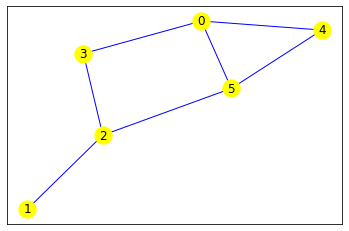

<Figure size 7200x3600 with 0 Axes>

In [11]:
#plotting the graph for better visulaization

G = nx.Graph()
G.add_edges_from(mylist)
random_pos = nx.random_layout(G, seed=30)
pos = nx.spring_layout(G,k=0.10,iterations=20,pos=random_pos)
nx.draw_networkx_nodes(G, pos,node_color = 'yellow')
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edge_color='blue')
p=plt.figure(figsize=(100,50))


In [12]:
l=G.degree()
print("nodes &  repective total number of edges connected:", l)

nodes &  repective total number of edges connected: [(1, 1), (2, 3), (5, 3), (4, 2), (0, 3), (3, 2)]


In [13]:
vertices  = range(X)
edge=len(edges)

In [14]:
print(edge)

7


In [15]:
S=[ [ 0 for i in range(edge) ] for j in range(X) ] 

    

In [16]:
S

[[0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0]]

In [17]:
# creating the matrix with the vertices and edges  

for j in range (len(edges)):
    l,m=edges[j]
    S[l][j]=1
    S[m][j]=1
   

In [18]:
S

[[0, 0, 0, 1, 1, 0, 1],
 [1, 0, 0, 0, 0, 0, 0],
 [1, 1, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 1, 1, 0],
 [0, 0, 1, 1, 0, 0, 0],
 [0, 1, 1, 0, 0, 0, 1]]

In [19]:
m=Model("Problem4")

Using license file /Users/madhusmitakalita/gurobi.lic
Academic license - for non-commercial use only


In [20]:
#adding variable
c = []
for i in range(len(S)):
    v= m.addVar(lb=0, ub=1,vtype=GRB.BINARY,name=str(i))
    c.append(v)

In [21]:
#objective function
obj2 =0
obj1 =0


for v in c:
    obj1+=v
    
for i in range (len(c)):
    for j in range (edge):
        obj2+=S[i][j]*c[i]

m.setObjective(obj1+obj2, GRB.MINIMIZE)

In [22]:
#adding the constraint
for j in range(edge):
    const=0
    for i in range(len(c)):
        const+=S[i][j]*c[i]
    m.addConstr(const>=1)

In [23]:
m.optimize()

Gurobi Optimizer version 9.0.2 build v9.0.2rc0 (mac64)
Optimize a model with 7 rows, 6 columns and 14 nonzeros
Model fingerprint: 0x2659fcf5
Variable types: 0 continuous, 6 integer (6 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+00, 4e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 14.0000000
Presolve removed 3 rows and 1 columns
Presolve time: 0.00s
Presolved: 4 rows, 5 columns, 9 nonzeros
Variable types: 0 continuous, 5 integer (5 binary)

Root relaxation: objective 1.100000e+01, 3 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0      11.0000000   11.00000  0.00%     -    0s

Explored 0 nodes (3 simplex iterations) in 0.01 seconds
Thread count was 8 (of 8 available processors)

Solution count 2: 11 14 

Optimal solution found 

In [24]:

print("optimal value: " ,m.objVal)

optimal value:  11.0


In [25]:
c

[<gurobi.Var 0 (value 1.0)>,
 <gurobi.Var 1 (value 0.0)>,
 <gurobi.Var 2 (value 1.0)>,
 <gurobi.Var 3 (value -0.0)>,
 <gurobi.Var 4 (value 1.0)>,
 <gurobi.Var 5 (value 0.0)>]

In [26]:
g=[]
for v in m.getVars():
        e=v.x
        if e==1:
            g.append(v.varName)
        

In [27]:
print(" the minimum index to cover edges are:")
print(g)

 the minimum index to cover edges are:
['0', '2', '4']


In [28]:
for i in range(0, len(g)): 
    g[i] = int(g[i])

Pink vertices are the selected vertices


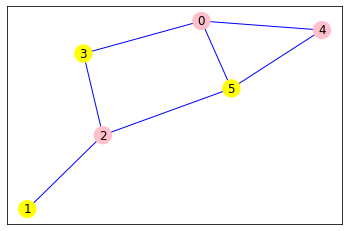

<Figure size 7200x3600 with 0 Axes>

In [29]:
G = nx.Graph()
G.add_edges_from(mylist)
random_pos = nx.random_layout(G, seed=30)
pos = nx.spring_layout(G,k=0.10,iterations=20,pos=random_pos)

color_map = []
for node in G:
    if node not in g:
        color_map.append('yellow')
    else: 
        color_map.append('pink')

nx.draw_networkx_nodes(G, pos,node_color=color_map)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edge_color='blue')
p=plt.figure(figsize=(100,50))
print("Pink vertices are the selected vertices")
